In [1]:
import matplotlib.pyplot as plt
from Objects.Simulation import Simulation
import numpy as np
import pandas as pd
%pylab
%matplotlib inline

from matplotlib import lines, markers
from cycler import cycler

# Create cycler object. Use any styling from above you please
monochromeWithMarker = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '-.']) * cycler('marker', [ '.' ,'^']))
monochromeNoMarker = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '-.']) * cycler('marker', [',']))
monochrome = monochromeNoMarker.concat(monochromeWithMarker)

plt.set_cmap('gray')
# Overriding styles for current script
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['figure.figsize'] = (12,5)
mpl.rcParams['figure.dpi']= 300
plt.rcParams['axes.prop_cycle'] = monochrome


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


<Figure size 432x288 with 0 Axes>

In [2]:
plt.set_cmap('gray')
# Overriding styles for current script
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['figure.figsize'] = (12,5)
mpl.rcParams['figure.dpi']= 300
plt.rcParams['axes.prop_cycle'] = monochrome

<Figure size 432x288 with 0 Axes>

In [3]:
subFolder = "SG1/"
av_avg_delay = pd.read_csv(subFolder+'SG1_av_avg_delay.csv',index_col=0)
av_max_delay = pd.read_csv(subFolder+'SG1_av_max_delay.csv',index_col=0)
av_vdr = pd.read_csv(subFolder+'SG1_av_vdr.csv',index_col=0)
cav_avg_delay = pd.read_csv(subFolder+'SG1_cav_avg_delay.csv',index_col=0)
cav_max_delay = pd.read_csv(subFolder+'SG1_cav_max_delay.csv',index_col=0)
cav_vdr = pd.read_csv(subFolder+'SG1_cav_vdr.csv',index_col=0)
xlabel = "maximum acceleration"
ylabel="maximum deceleration"


In [4]:
av_avg_delay

,1.4,1.36,1.32,1.28,1.24,1.2,1.16,1.12,1.08,1.04,...,0.84,0.8,0.76,0.72,0.68,0.64,0.6,0.56,0.52,0.48
-1.40,20.969009,21.106918,20.682983,20.838385,21.005572,21.185901,21.380947,21.006181,21.231617,21.477759,...,21.890295,22.326929,22.820600,23.383017,23.357038,24.087516,24.944085,25.225752,26.418122,27.880832
-1.36,20.937968,21.075156,21.222090,20.806274,20.972605,21.152009,21.346049,20.971600,21.195897,21.440788,...,22.471321,22.282895,22.774038,23.333530,23.306617,24.033301,24.885335,25.164753,26.350779,27.805544
-1.32,20.905770,21.042214,21.188351,20.772977,20.938427,21.116877,21.309883,20.935766,21.158890,21.402493,...,22.426080,22.237343,22.725885,23.282368,23.254498,23.977277,24.824641,25.101743,26.281232,27.727804
-1.28,20.872333,21.008011,21.153326,20.738413,20.902954,21.080422,21.272362,21.480573,21.120508,21.362784,...,22.379226,22.190174,22.676038,23.229425,23.200572,23.919328,24.761883,25.036599,26.209347,27.647466
-1.24,20.837568,20.972456,21.116923,21.272000,20.866095,21.042550,21.233391,21.440405,21.080655,21.321564,...,22.330650,22.141278,22.624384,23.174581,23.144719,23.859331,24.696928,24.969184,26.134977,27.564369
-1.20,20.801379,20.935449,21.079041,21.233177,20.827748,21.003157,21.192863,21.398642,21.039224,21.278723,...,22.280230,22.090535,22.570798,23.117706,23.086809,23.797146,24.629630,24.899348,26.057962,27.478338
-1.16,20.763655,20.896880,21.039567,21.192730,21.357533,20.962129,21.150663,21.355165,21.577700,21.234140,...,22.227834,22.659929,22.515141,23.058656,23.682839,23.732623,24.559828,24.826928,25.978124,27.389178
-1.12,21.284982,20.856626,20.998376,21.150533,21.314251,20.919337,21.106659,21.309841,21.530935,21.187681,...,22.173312,22.602610,22.457260,22.997271,23.617361,23.665591,24.487344,24.751741,25.895268,27.296678
-1.08,21.242284,20.814549,20.955328,21.106442,21.269037,20.874639,21.060705,21.262522,21.482124,21.139196,...,22.116498,22.542906,22.396982,22.933373,23.549232,23.595863,24.411980,25.380441,25.809177,27.200601
-1.04,21.197575,21.330490,20.910265,21.060297,21.221727,21.395867,21.012638,21.213040,21.431096,21.669181,...,22.057205,22.480624,22.334116,22.866762,23.478245,23.523228,24.333514,25.294888,25.719608,27.100686


In [5]:
human_avg_delay,human_max_delay,human_vdr = 21.045918298965475, 39.95519946607026, 1800.0

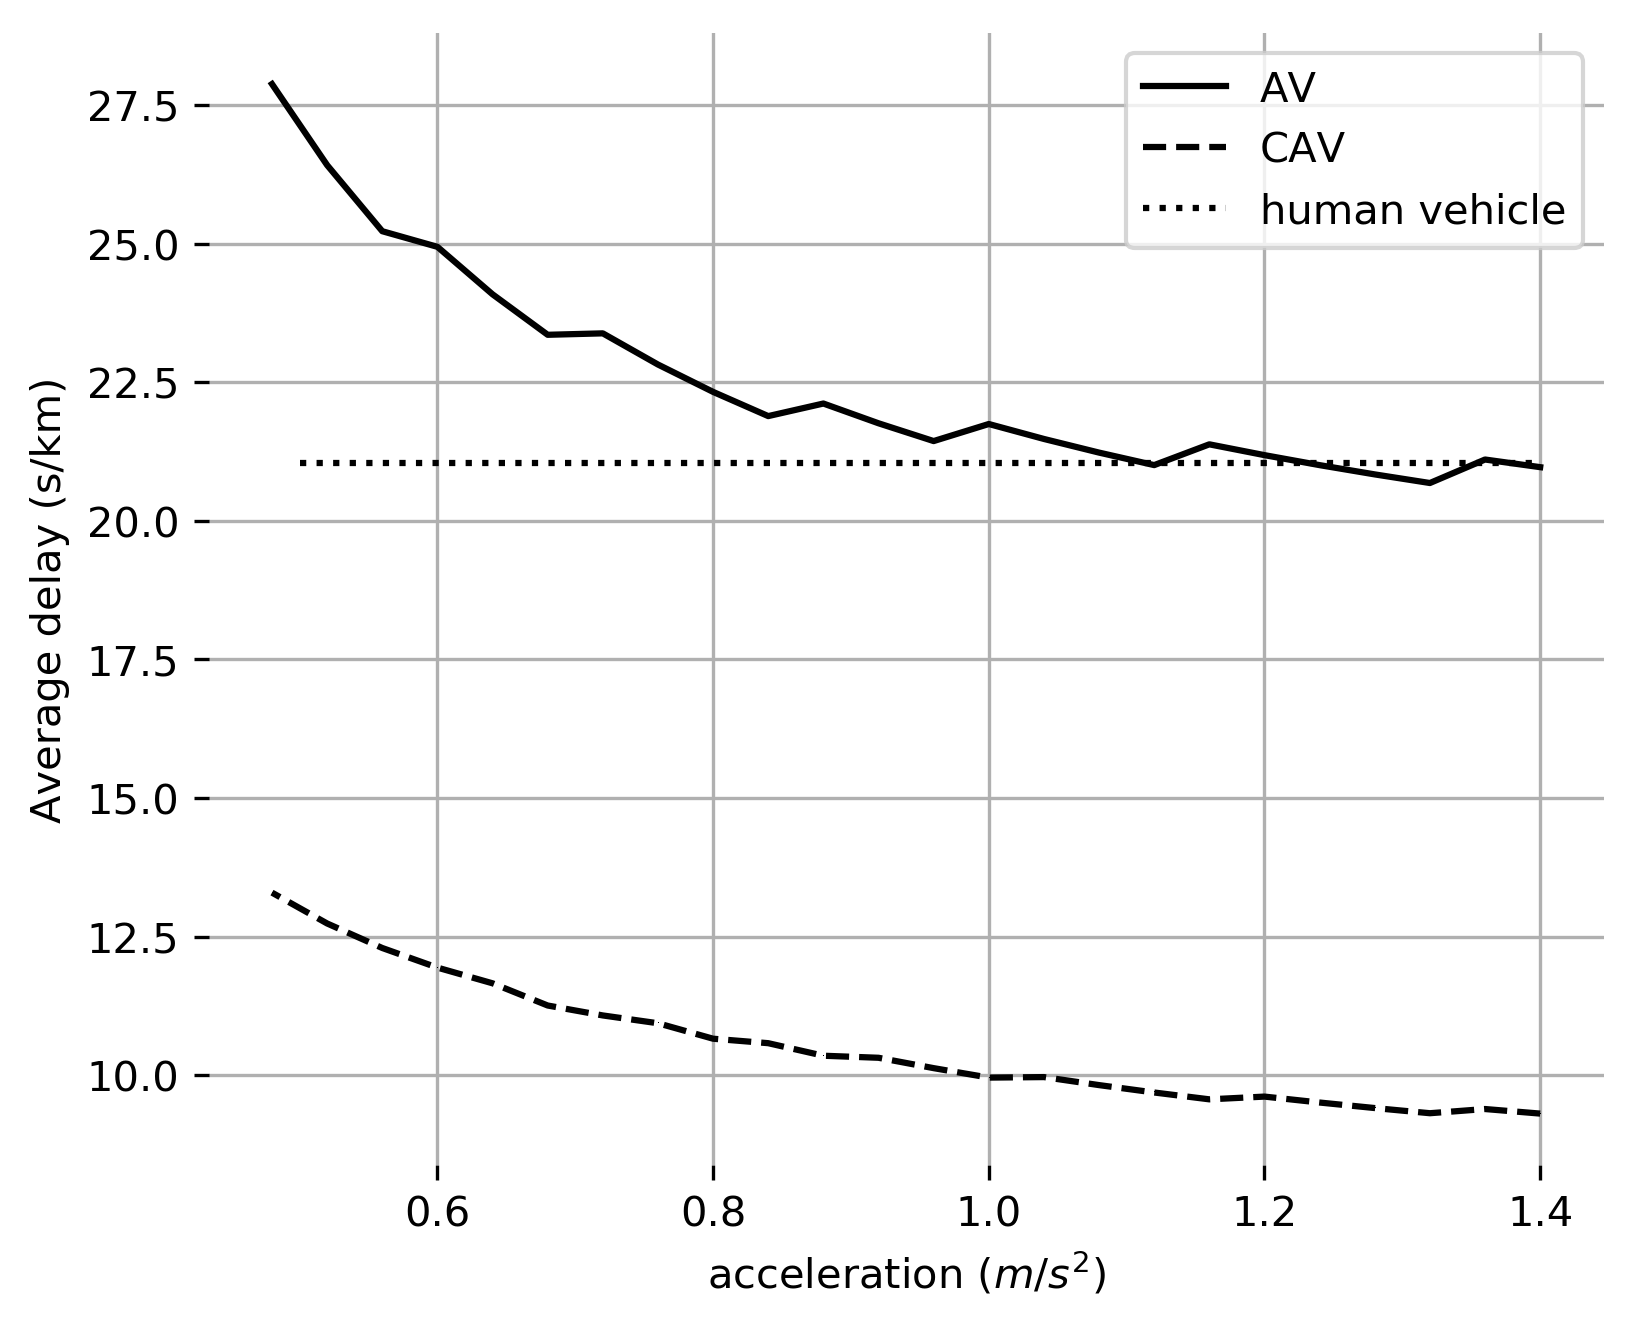

In [6]:
def get_xs_ys(df):
    sample_delay_fix_dec = df.values[0]
    sample_delay_fix_acc = np.array(df['1.4'])
    y1 = sample_delay_fix_dec
    y2 = sample_delay_fix_acc
    x1 = np.float64(df.columns)
    x2 = np.float64(np.abs(df.index))
    return  [x1,y1,x2,y2]

plt.figure(figsize=(6,5))
av_avg_delay_res = get_xs_ys(av_avg_delay)
av_max_delay_res = get_xs_ys(av_max_delay)
av_vdr_res = get_xs_ys(av_vdr)
cav_avg_delay_res = get_xs_ys(cav_avg_delay)
cav_max_delay_res = get_xs_ys(cav_max_delay)
cav_vdr_res = get_xs_ys(cav_vdr)
plt.xlabel("acceleration "+ r"$(m/s^{2})$")
plt.ylabel("Average delay (s/km)")
plt.plot(av_avg_delay_res[0], av_avg_delay_res[1], label = "AV")
plt.plot(cav_avg_delay_res[0], cav_avg_delay_res[1], label = "CAV")
plt.hlines(y=human_avg_delay,xmax=1.4, xmin=0.5,label = "human vehicle", linestyles='dotted')
plt.legend(title='')



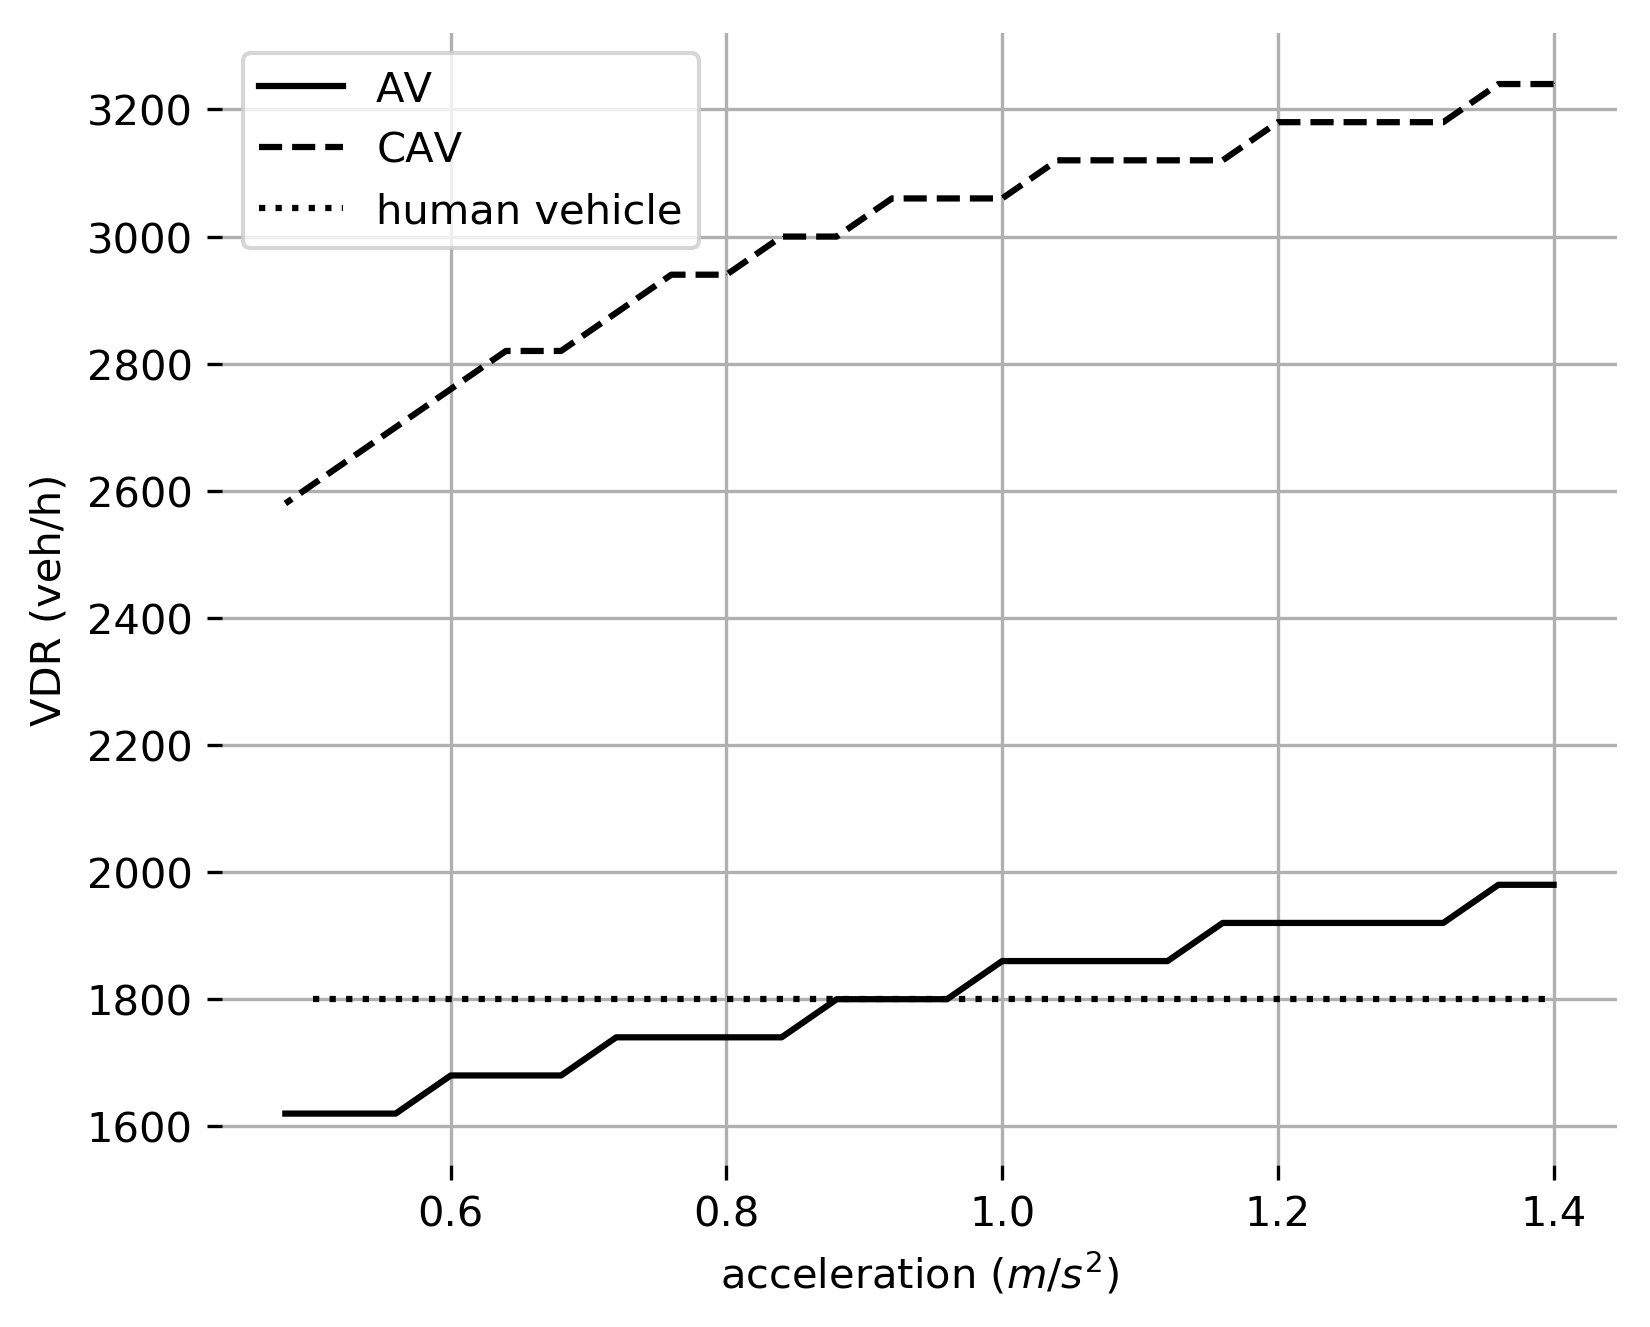

In [7]:
plt.figure(figsize=(6,5))
plt.xlabel("acceleration "+ r"$(m/s^{2})$")
plt.ylabel("VDR (veh/h)")
plt.plot(av_vdr_res[0], av_vdr_res[1], label = "AV")
plt.plot(cav_vdr_res[0], cav_vdr_res[1], label = "CAV")
plt.hlines(y=human_vdr,xmax=1.4, xmin=0.5,label = "human vehicle", linestyles='dotted')
plt.legend(title='')

In [8]:
def cal_max_min_two_df(df1,df2):
    df1max = np.max(np.max(df1))
    df1min = np.min(np.min(df1))
    df2max = np.max(np.max(df2))
    df2min = np.min(np.min(df2))
    return max(df1max,df2max), min(df1min,df2min)
import seaborn as sns
sns.set()

Text(0.5,1,'(a)')

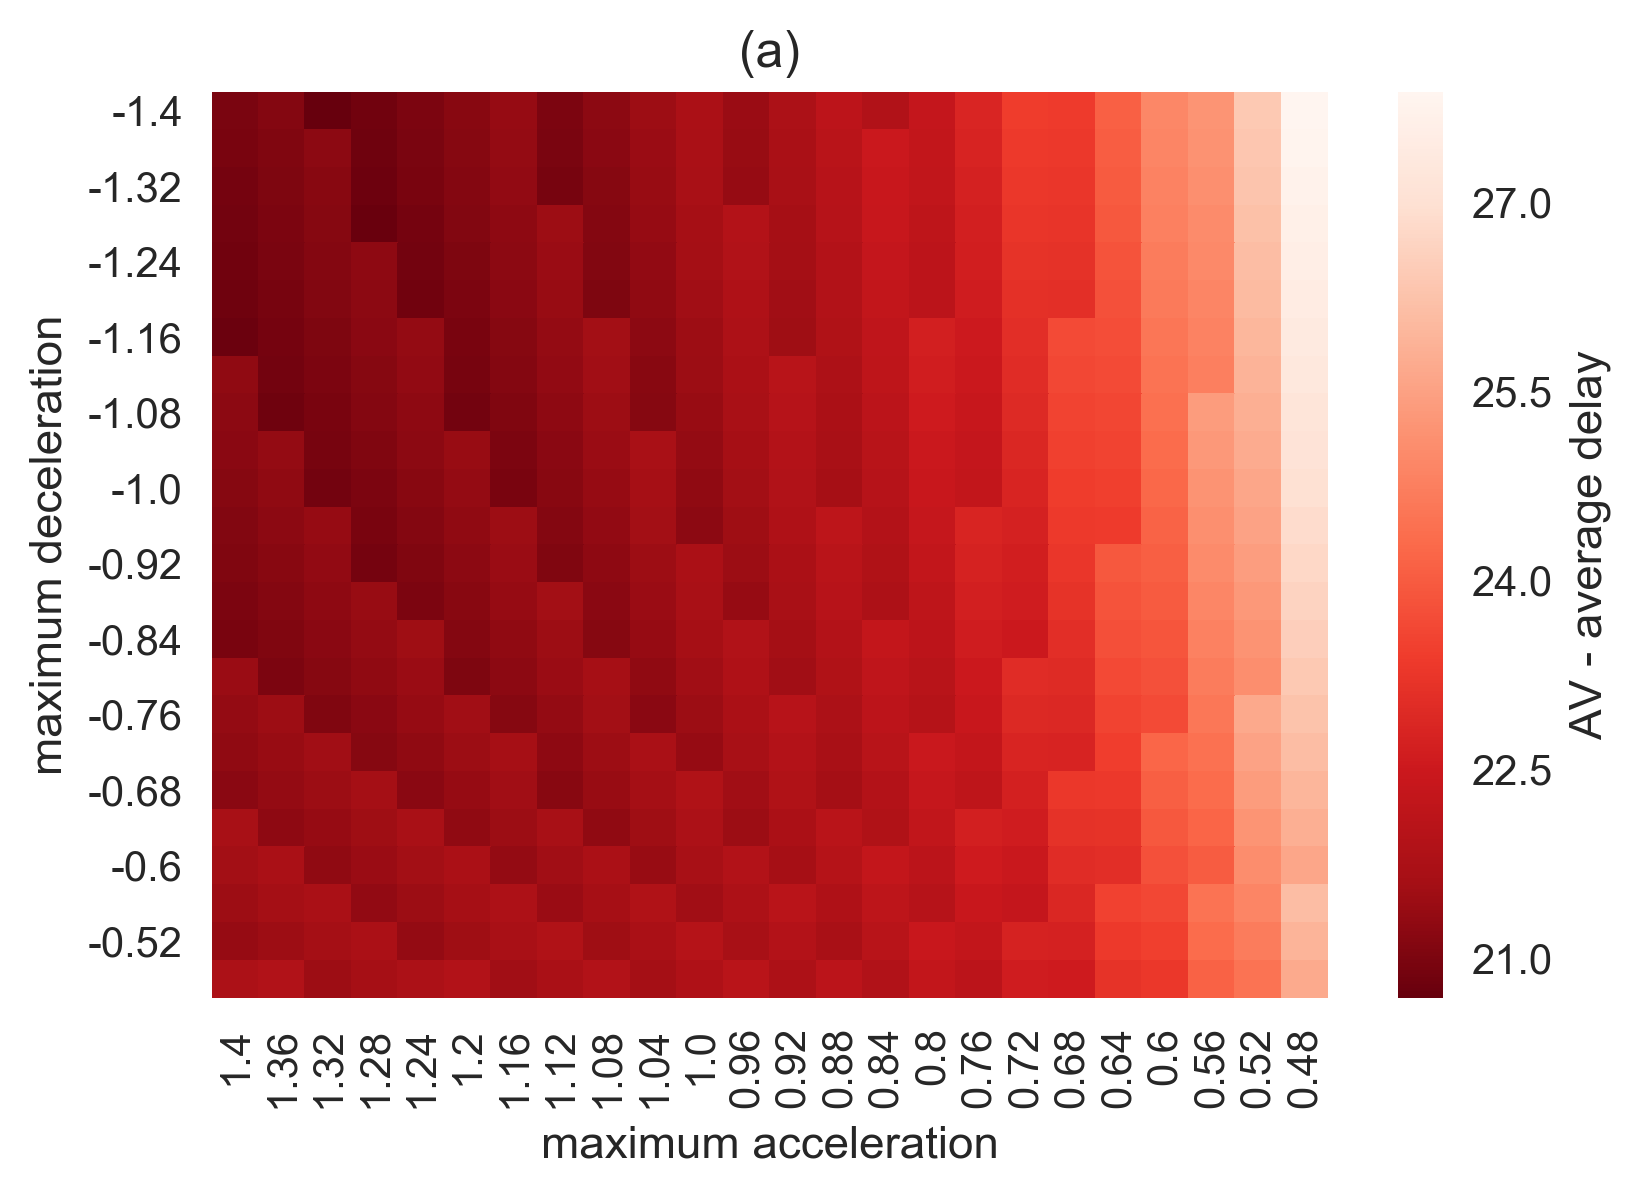

In [9]:
# maxvalue, minvalue =cal_max_min_two_df(av_avg_delay, cav_avg_delay) 
plt.figure(figsize=(6,4))
ax = plt.axes()
av_avg_delay.index.name = ylabel
av_avg_delay.columns.name = xlabel
sns.heatmap(av_avg_delay,cmap="Reds_r" , ax = ax,cbar_kws={'label': 'AV - average delay'} )
ax.set_title('(a)')

Text(0.5,1,'(b)')

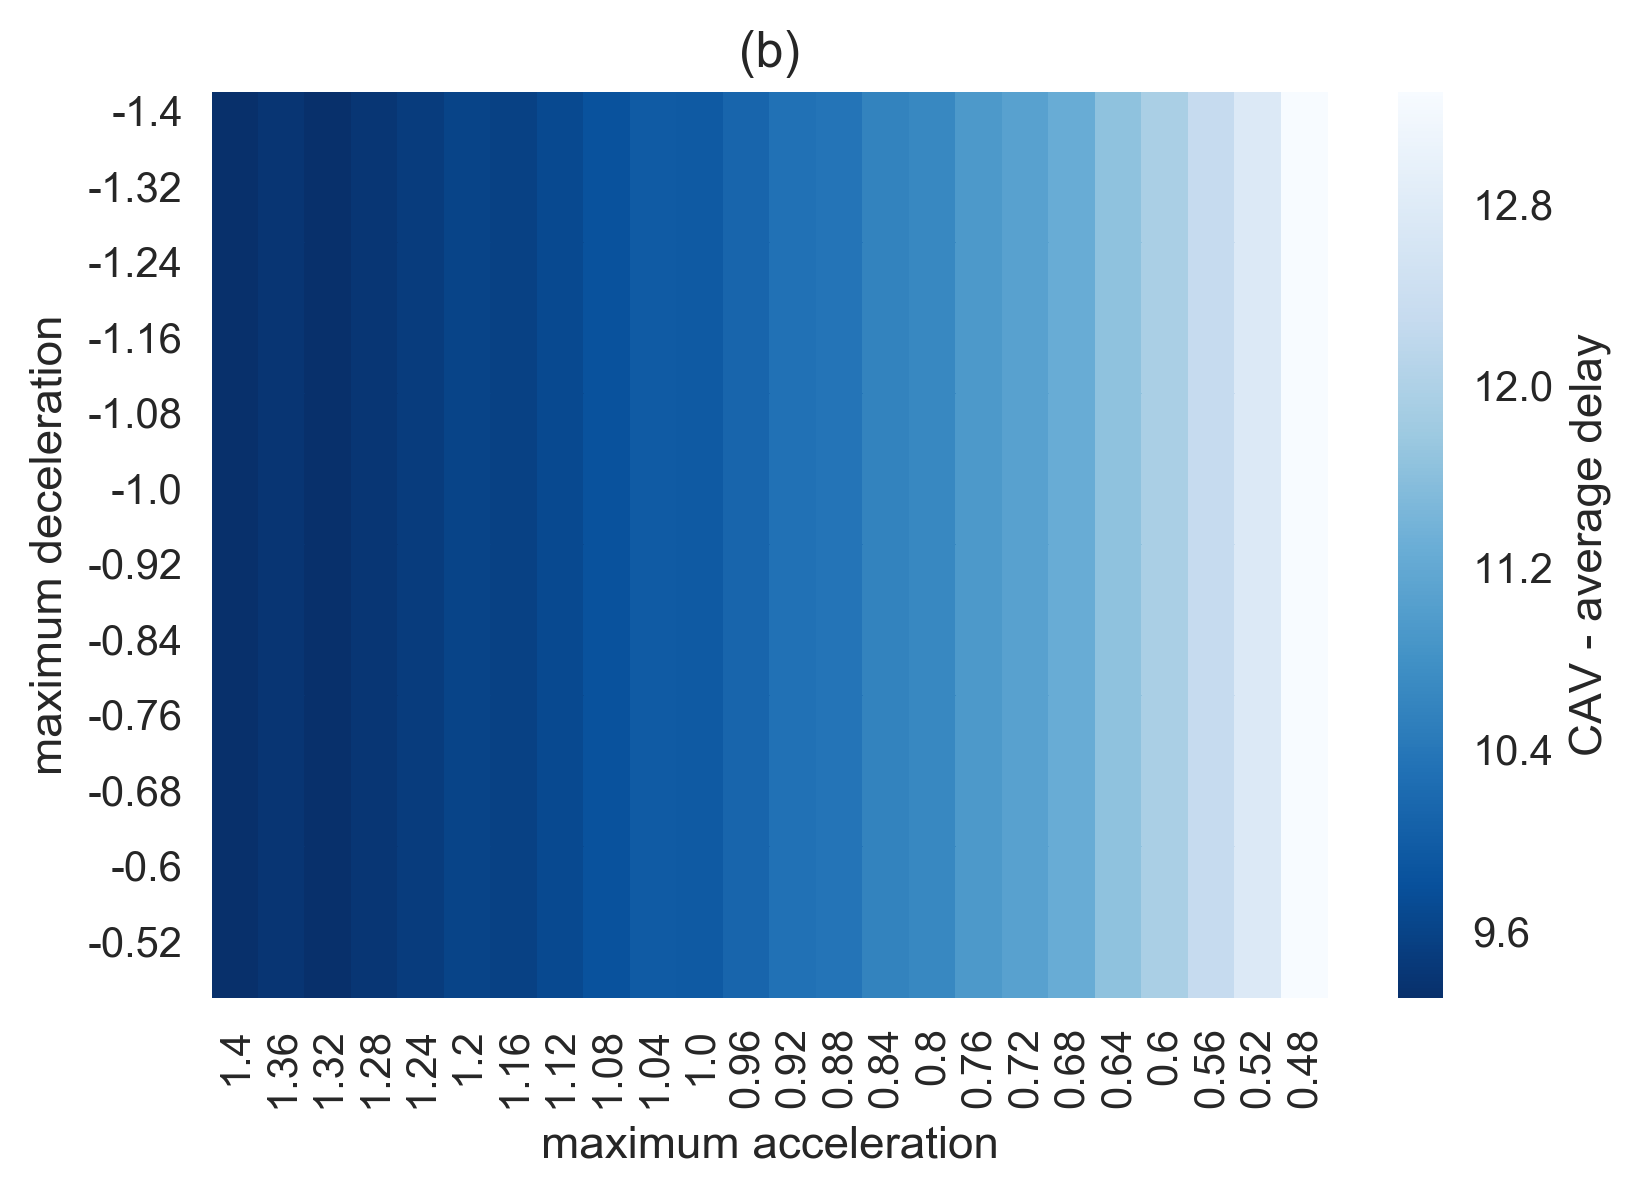

In [10]:
plt.figure(figsize=(6,4))
ax = plt.axes()
cav_avg_delay.columns.name = xlabel
cav_avg_delay.index.name = ylabel
sns.heatmap(cav_avg_delay, cbar_kws={'label': 'CAV - average delay'}, cmap="Blues_r", ax = ax)
ax.set_title('(b)')

Text(0.5,1,'(c)')

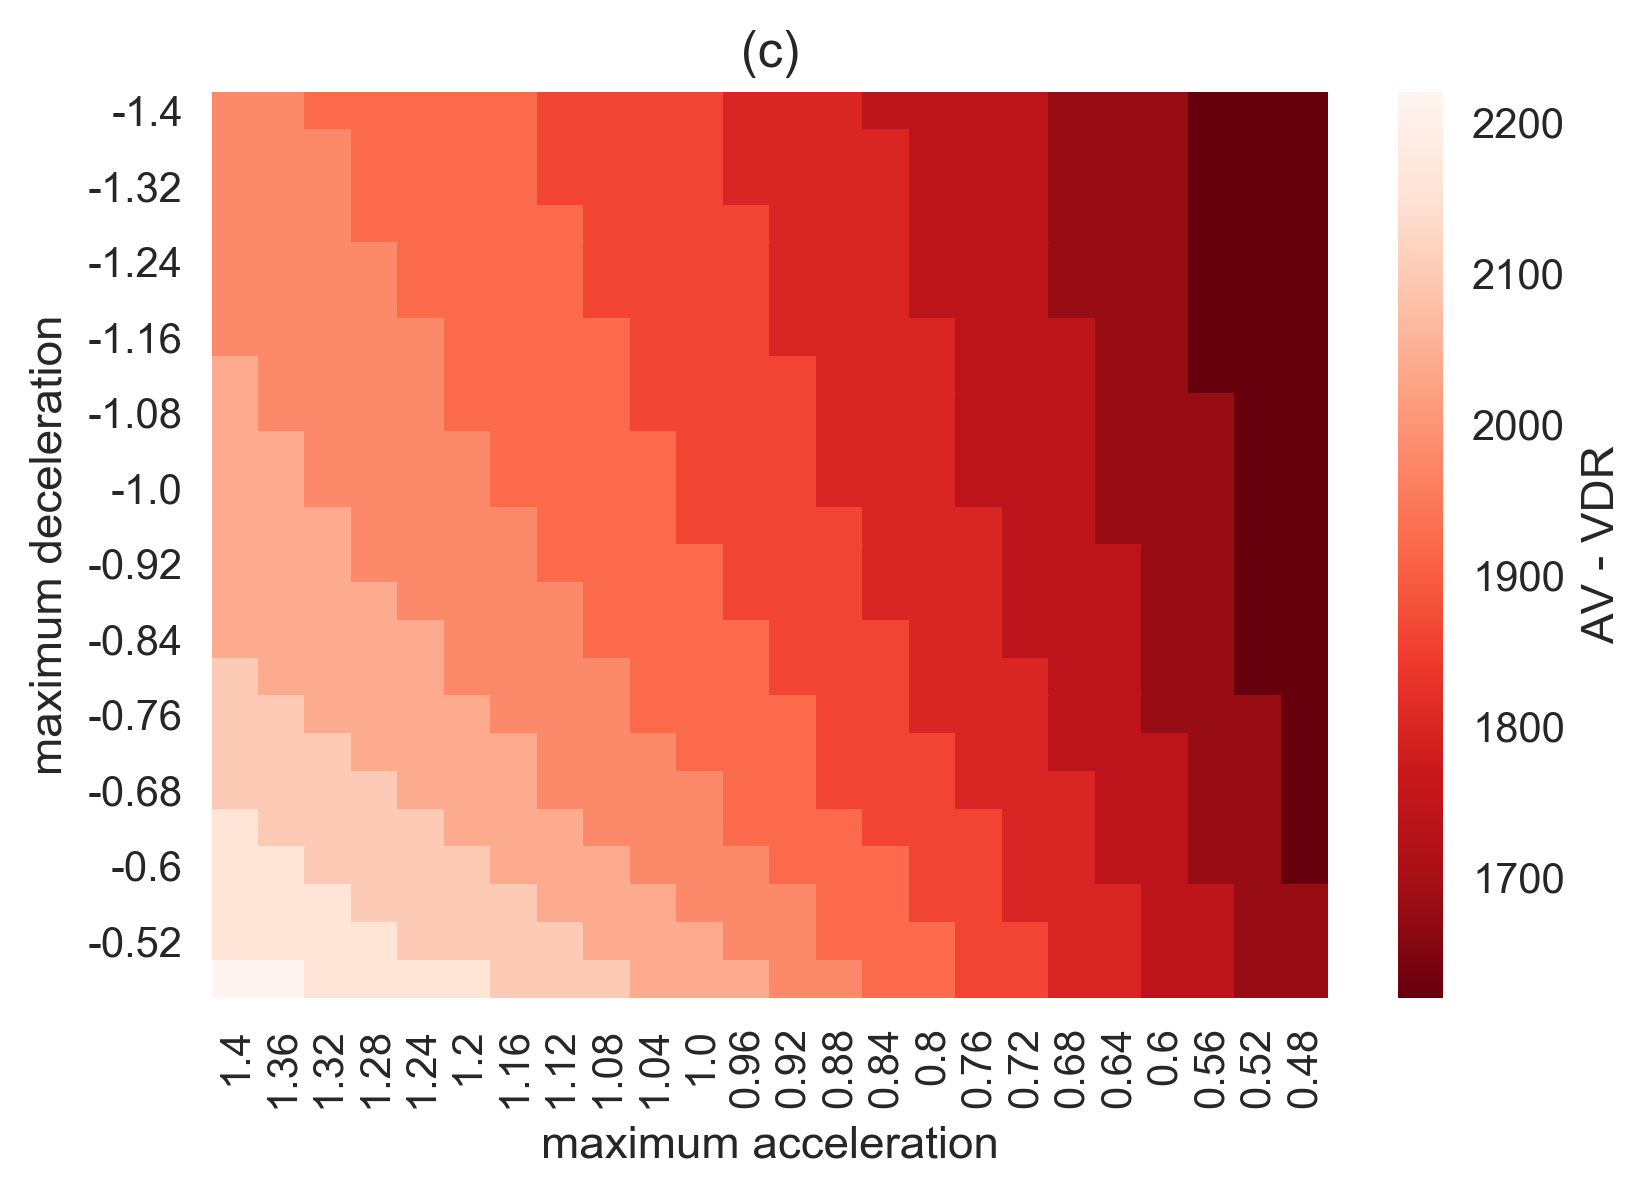

In [11]:
# maxvalue, minvalue =cal_max_min_two_df(av_avg_delay, cav_avg_delay) 
plt.figure(figsize=(6,4))
ax = plt.axes()
av_vdr.index.name = ylabel
av_vdr.columns.name = xlabel
sns.heatmap(av_vdr,cmap="Reds_r" , ax = ax,cbar_kws={'label': 'AV - VDR'} )
ax.set_title('(c)')

Text(0.5,1,'(d)')

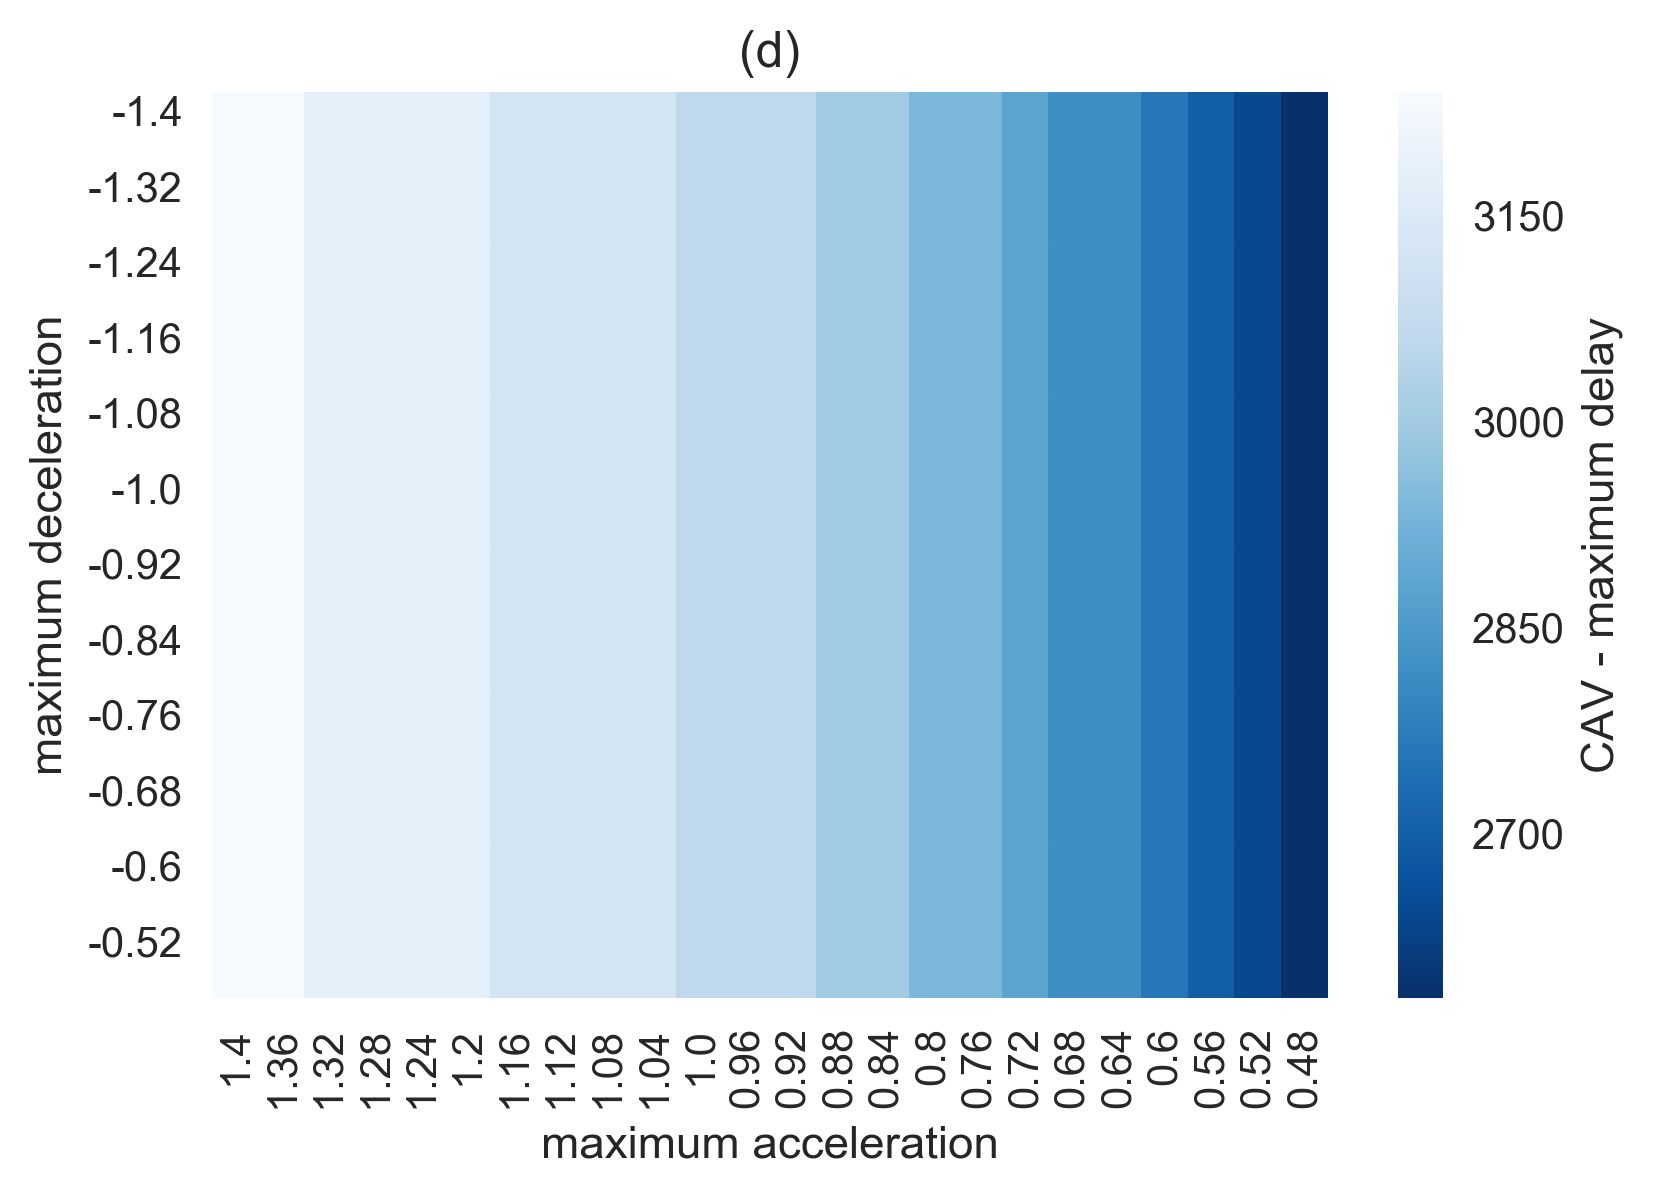

In [12]:
plt.figure(figsize=(6,4))
ax = plt.axes()
cav_vdr.columns.name = xlabel
cav_vdr.index.name = ylabel
sns.heatmap(cav_vdr, cbar_kws={'label': 'CAV - maximum delay'}, cmap="Blues_r", ax=ax)
ax.set_title('(d)')